# Capstone Project: Amazon Review Classification (Part 4)
Author: **Steven Lee**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Word-Count-Frequency-Distribution" data-toc-modified-id="Word-Count-Frequency-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word Count Frequency Distribution</a></span></li><li><span><a href="#Topic-Word-Count-Frequency-Distribution" data-toc-modified-id="Topic-Word-Count-Frequency-Distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Topic Word Count Frequency Distribution</a></span></li><li><span><a href="#Top-10-Topical-Keywords-Word-Clouds" data-toc-modified-id="Top-10-Topical-Keywords-Word-Clouds-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Top 10 Topical Keywords Word Clouds</a></span></li></ul></div>

## Import Libraries

In [1]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Set pandas display options.
pd.set_option('display.max_colwidth', 150)

# Set Seaborn plot (default) to display grid over white background.
sns.set_style('whitegrid')

# Enable plots with higher resolution.
%config InlineBackend.figure_format = 'retina'

# Set output of plots to display inline directly below the code cell that produced it.
%matplotlib inline

import warnings
# warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Prepare Data

In [2]:
# Read in clean reviews dataset.
reviews = pd.read_csv("../data/reviews_lda.csv")
reviews.shape

(1477655, 9)

In [3]:
reviews.head(3)

,dmnt_topic,pct_contrib,reviewText,main_cat,category,brand,document,word_cnt,overall
0,21,0.7583,"returned, decided against this product",Tools & Home Improvement,27,SioGreen,returned decided product,5,5.0
1,22,0.3845,Awesome heater for the electrical requirements! Makes an awesome preheater for my talnkless system,Tools & Home Improvement,27,SioGreen,awesome heater electrical requirement make awesome preheater talnkless system,14,5.0
2,13,0.8389,Keeps the mist of your wood trim and on you. Bendable too.,Tools & Home Improvement,27,SioGreen,keep mist wood trim bendable,12,5.0


## Word Count Frequency Distribution

In [4]:
word_cnt = reviews['word_cnt']
print(word_cnt.value_counts())

5      60959
6      57546
7      50263
8      46412
9      42082
       ...  
126     2196
125     2192
124     2166
127     2066
128     2061
Name: word_cnt, Length: 124, dtype: int64


In [5]:
word_cnt.describe()

count    1.477655e+06
mean     3.573487e+01
std      2.944650e+01
min      5.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      5.000000e+01
max      1.280000e+02
Name: word_cnt, dtype: float64

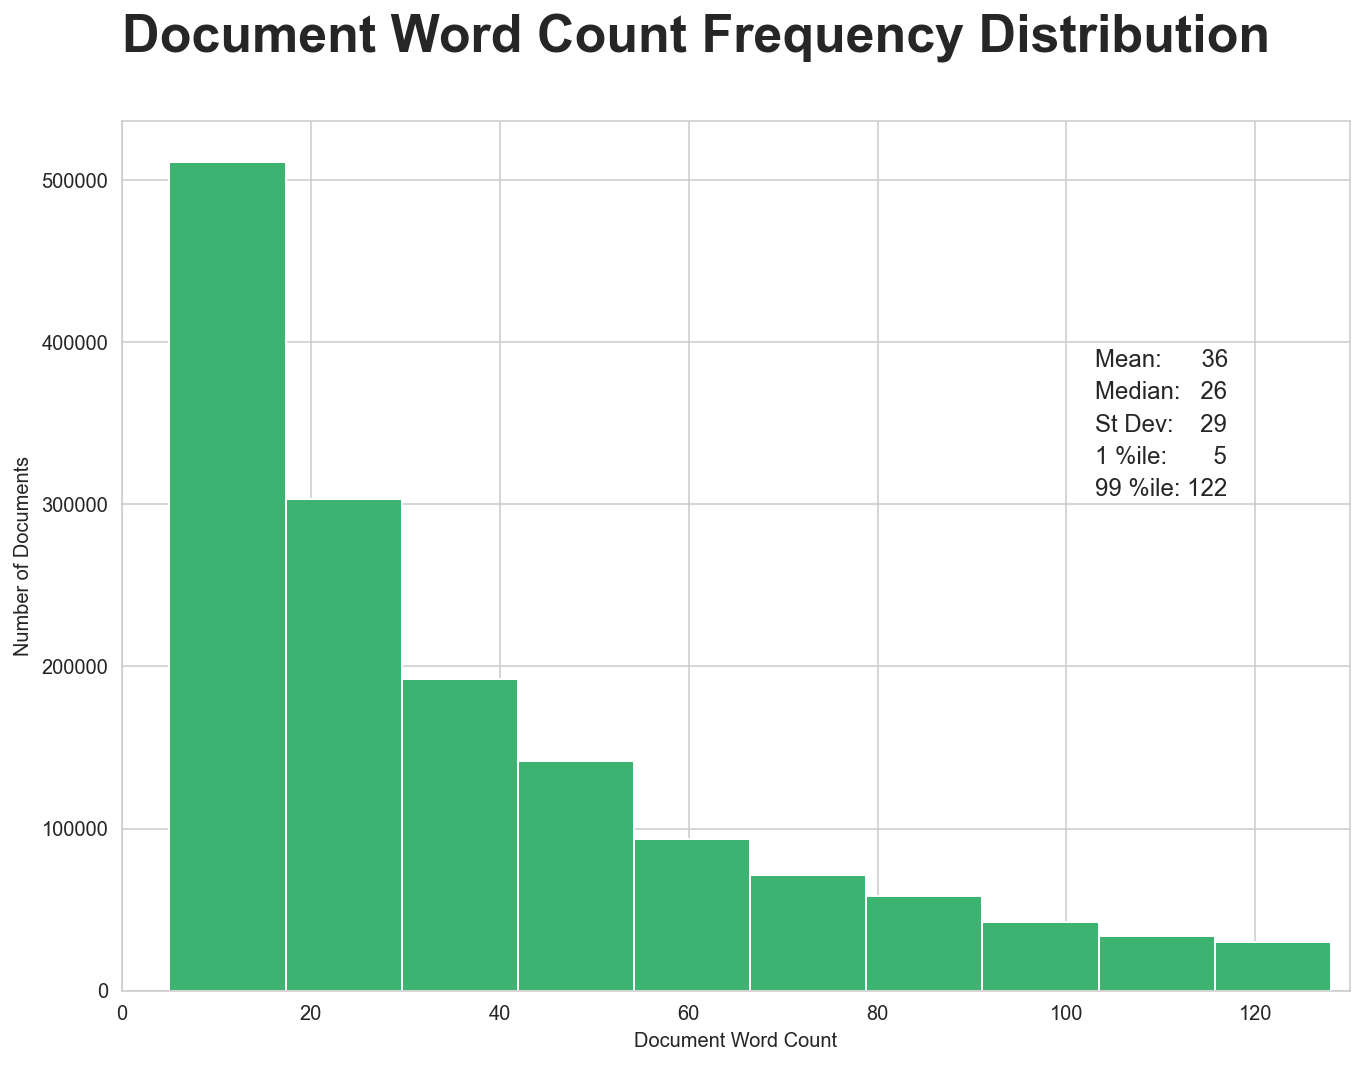

In [6]:
plt.figure(figsize=(11, 8))
plt.hist(word_cnt, bins=10, color='mediumseagreen')
plt.text(103, 385000, "Mean:      " + str(round(np.mean(word_cnt))), fontsize=12)
plt.text(103, 365000, "Median:   " + str(round(np.median(word_cnt))), fontsize=12)
plt.text(103, 345000, "St Dev:    " + str(round(np.std(word_cnt))), fontsize=12)
plt.text(103, 325000, "1 %ile:       " + str(round(np.quantile(word_cnt, q=0.01))), fontsize=12)
plt.text(103, 305000, "99 %ile: " + str(round(np.quantile(word_cnt, q=0.99))), fontsize=12)

plt.gca().set(xlim=(0, 130), xlabel='Document Word Count', ylabel='Number of Documents')
plt.title("Document Word Count Frequency Distribution\n", fontsize=26, fontweight='bold', position=(0, 1), ha='left');

## Topic Word Count Frequency Distribution

In [7]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]    # More colors: 'mcolors.XKCD_COLORS'

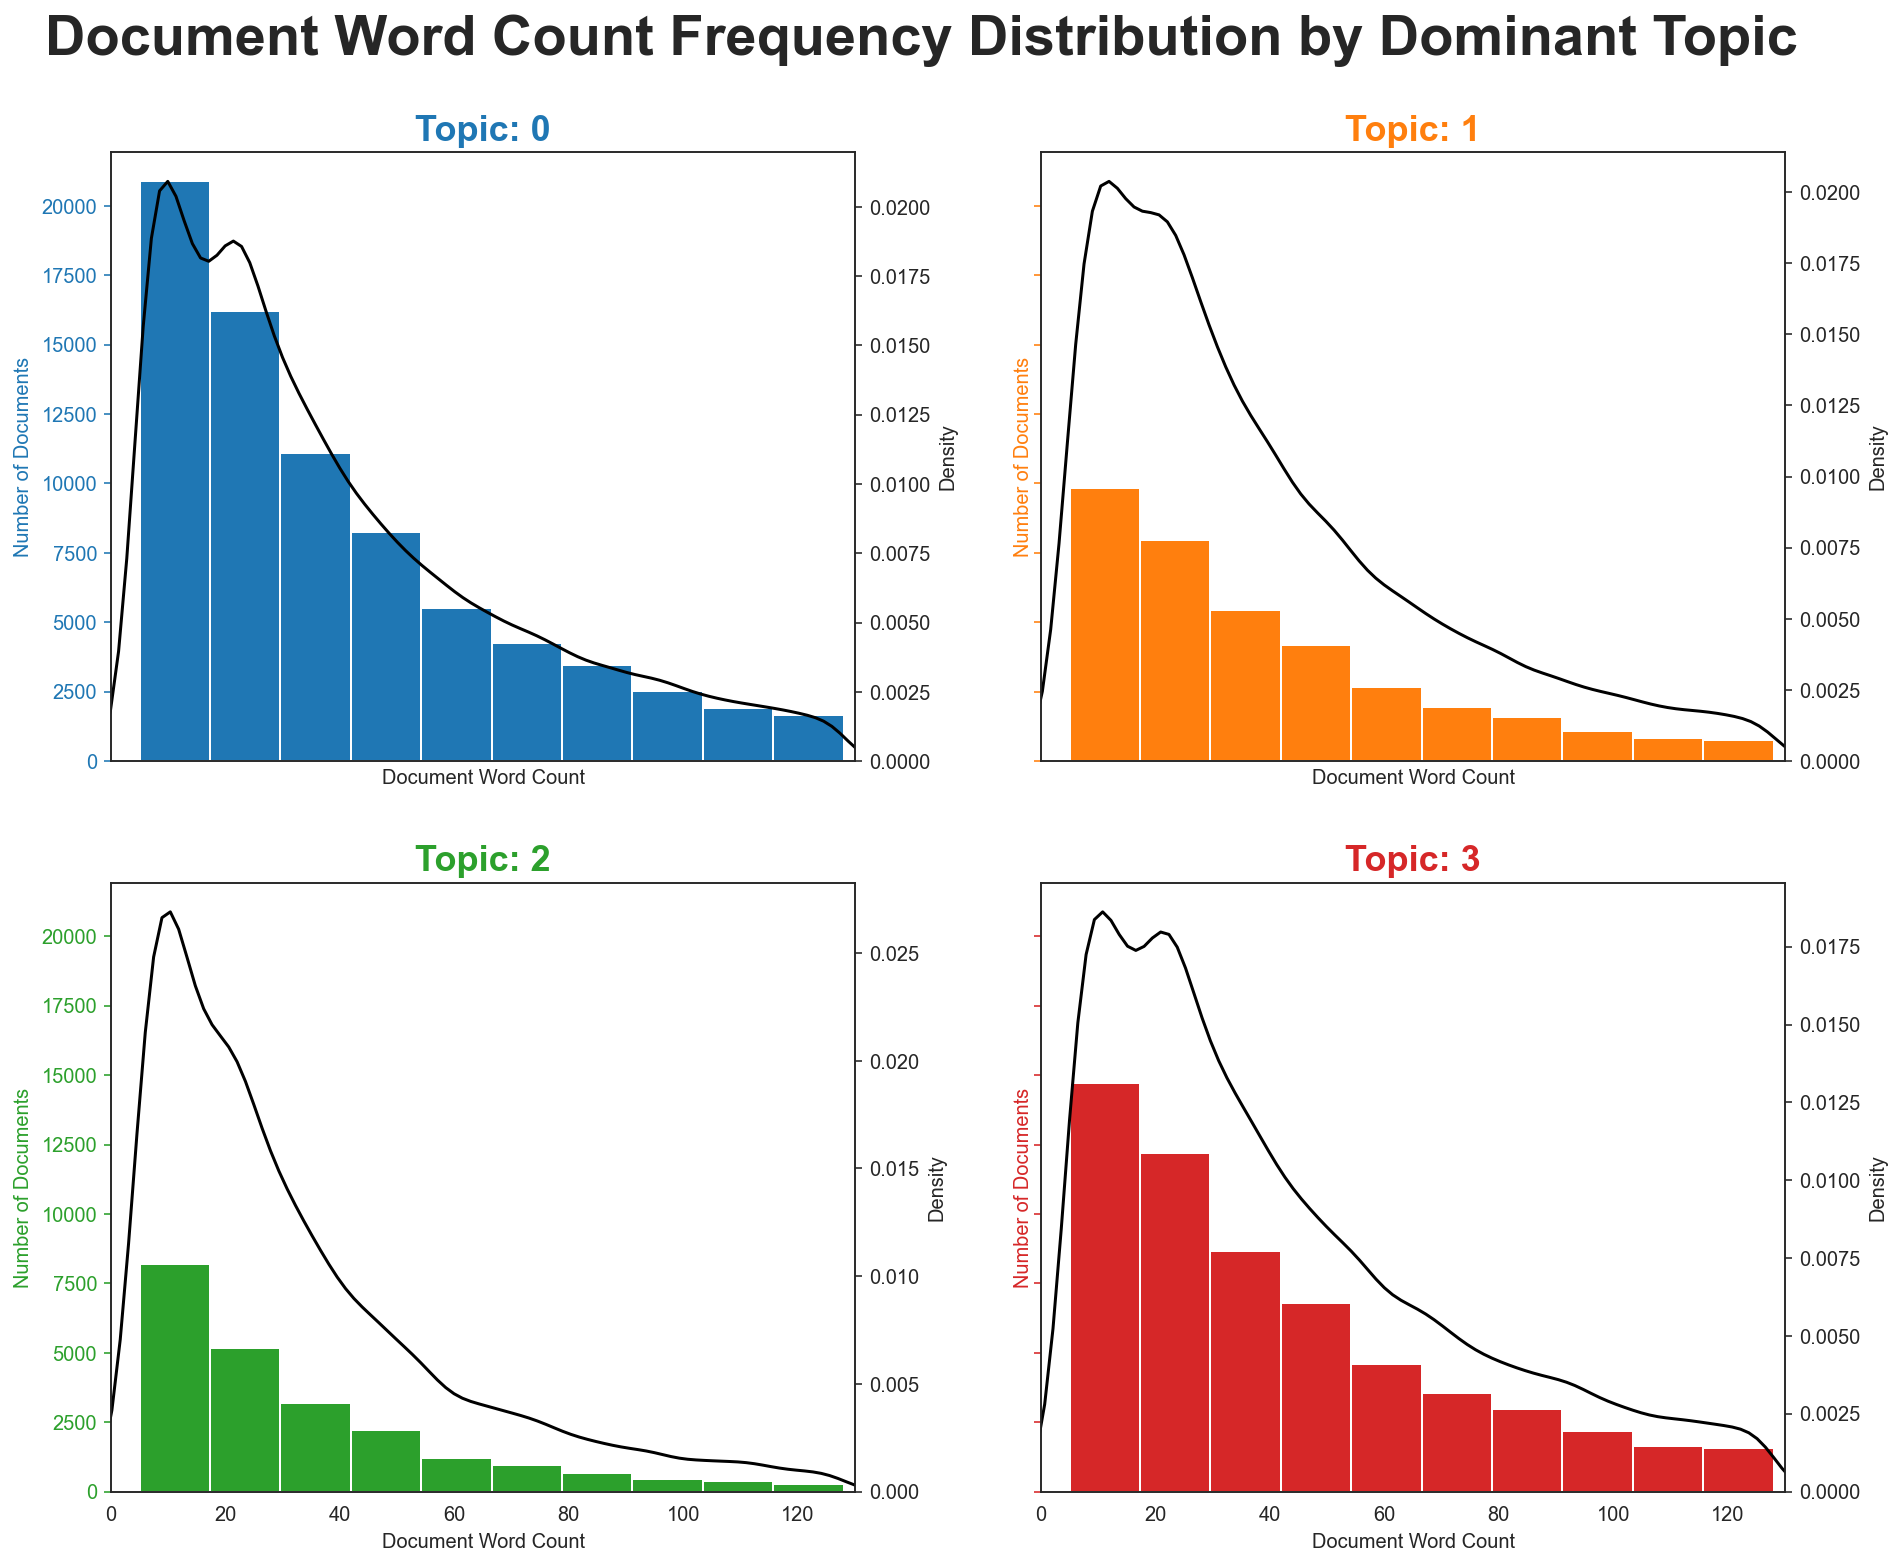

In [8]:
sns.set_style('white')

fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    word_cnt = reviews.loc[reviews['dmnt_topic'] == i, 'word_cnt']
    ax.hist(word_cnt, bins=10, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(word_cnt, color="black", shade=False, ax=ax.twinx(), gridsize=100)
    ax.set(xlim=(0, 130), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+ str(i), fontsize=18, fontweight='bold', color=cols[i])
    
fig.subplots_adjust(top=0.9, hspace=0.2, wspace=0.25)
fig.suptitle("Document Word Count Frequency Distribution by Dominant Topic\n", 
             fontsize=28, fontweight='bold');

## Top 10 Topical Keywords Word Clouds

In [9]:
# Read in clean reviews dataset.
topics = pd.read_csv("../data/topics_lda.csv")
topics.head(5)

,Dmnt_Topic,Keywords,Total_Docs,Pct_Docs
0,0,"tool, small, screw, size, wrench, great, bit, nice, driver, tight",75782,0.0513
1,1,"cord, power, outlet, plug, would, need, little, extension, socket, wish",36298,0.0246
2,2,"floor, amazing, get, great, clean, quiet, tile, done, work, used",22762,0.0154
3,3,"knife, pocket, sharp, blade, carry, clip, tool, little, great, small",58888,0.0399
4,4,"light, lamp, room, cool, night, really, bright, like, work, love",49712,0.0336


In [10]:
keywords = topics['Keywords']

In [11]:
# Read in clean reviews dataset.
# topics = pd.read_csv("../data/topics_lda.csv")